<H2>課題3-2: 二元分散分析</H2>
<p>B社は、合成樹脂の製造に用いられる試薬の製造・販売しています。新製品を開発するにあたり、製造条件が製造量に変化を与えるか否かを検討したいと考えています。温度条件(100℃、200℃が20件ずつ)と反応時間（10時間、30時間が20件ずつ）の条件で10回ずつ実験を行いました。その結果が *dataset/data2.csv* です（データの合計：40件）。このデータを二元分散分析にて解析し、結論を出してみましょう。</p>
<p>レッスン7までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み¶</H2>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

<H2>2. データの読み込み</H2>

In [2]:
# データを読み込んで変数 data に格納
data = pd.read_csv("dataset/data2.csv")

In [3]:
# データの最初の5行だけ表示
data.head()

,Temp,Time,Volume
0,100,10,21.624345
1,100,10,19.388244
2,100,10,19.471828
3,100,10,18.927031
4,100,10,20.865408


<H2>3. データ内容の把握</H2>

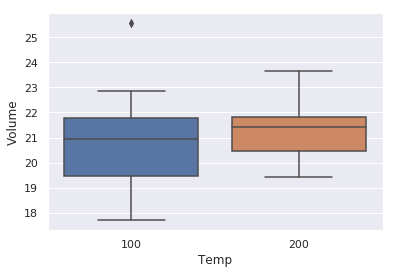

In [4]:
# 箱髭図にて温度ごとの製造量を表示
sns.boxplot(x='Temp', y='Volume', data=data)

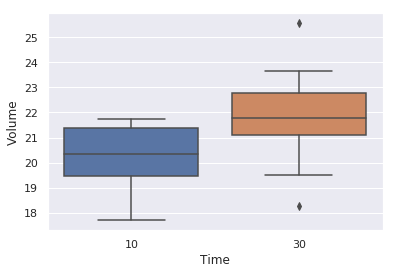

In [5]:
# 箱髭図にて反応時間ごとの製造量を表示
sns.boxplot(x='Time', y='Volume', data=data)

<H2>4. 分散分析</H2>
<H3>4-1. Statsmodelsを使った分散分析</H3>
<p>今回は先に、Statsmodelsのパッケージを使って計算してみましょう。</p>

In [6]:
# 最小二乗法を使い、反応時間と温度の両方を説明変数に入れて、モデルを作成
anova_model = smf.ols('Volume ~ Temp + Time', data=data).fit()

In [7]:
# Statsmodelsの関数を使って分散分析を実行し、結果を表示
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
Temp,2.573902,1.0,1.441871,0.237468
Time,22.149872,1.0,12.408114,0.001156
Residual,66.049143,37.0,NaN,NaN


<H3>4-2. 計算内容の理解</H3>

In [8]:
# 全体の平方和を求める
me_all = sp.mean(data['Volume'])

squares_all = sp.sum((data['Volume'] - me_all)**2)
squares_all

90.77291728168149

In [23]:
#　温度の平方和を求める
me_Temp_100 = sp.mean(data.query('Temp=="100"')['Volume'])
me_Temp_200 = sp.mean(data.query('Temp=="200"')['Volume'])
print('Temp 100:', me_Temp_100)
print('Temp 200:', me_Temp_200)

temp = [me_Temp_100]*20 + [me_Temp_200]*20
temp = np.array(temp)
squares_temp = sp.sum((temp - me_all)**2)
squares_temp

Temp 100: 20.81095130951942
Temp 200: 21.31828768787355


2.573902008014838

In [26]:
#　時間の平方和を求める
me_Time_10 = sp.mean(data.query('Time=="10"')['Volume'])
me_Time_30 = sp.mean(data.query('Time=="30"')['Volume'])
print('Time 10:', me_Time_10)
print('Time 30:', me_Time_30)

time = [me_Time_10]*20 + [me_Time_30]*20
time = np.array(time)
squares_time = sp.sum((time - me_all)**2)
squares_time

Time 10: 20.32047783804376
Time 30: 21.80876115934921


22.14987244475978

In [27]:
# 誤差の平方和を求める
squares_resid = squares_all - squares_temp - squares_time
squares_resid

66.04914282890687

In [12]:
df_temp = 2 - 1     # 温度の自由度
df_time = 2 - 1     # 時間の自由度
df_resid = (40 - 1) - df_temp - df_time   # 誤差の自由度

In [28]:
# 温度の分散を求める
variance_temp = squares_temp / df_temp
variance_temp

2.573902008014838

In [29]:
# 時間の分散を求める
variance_time = squares_time / df_time
variance_time

22.14987244475978

In [30]:
# 誤差の分散を求める
variance_resid = squares_resid / df_resid
# 誤差の分散を求める
variance_resid

1.7851119683488341

In [46]:
# 温度のF値を求める
f_ratio_temp = variance_temp / variance_resid
f_ratio_temp

1.441871464452511

In [45]:
# 時間のF値を求める
f_ratio_time = variance_time / variance_resid
f_ratio_time

12.408113797616647

In [47]:
# 温度のp値を求める
1 - sp.stats.f.cdf(x=f_ratio_temp, dfn=df_temp, dfd=df_resid)

0.2374678473721361

In [48]:
# 時間のp値を求める
1 - sp.stats.f.cdf(x=f_ratio_time, dfn=df_time, dfd=df_resid)

0.0011555176940120093

Statsmodelsで計算した場合と結果は一致しましたか？

<H2>4. 結果の解釈</H2>

p値を確認して結果を解釈しましょう。

温度によって、製造量は「 有意に異なるとは言えない 」<br>
反応時間によって、製造量は「 有意に異なる 」<br>
（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）